 <div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 60%; padding: 5px">
  <h1 id="subtitle">Chapter 2. Standard Library</h1>
  <h2 id="subtitle">Guillermo Avendaño Franco <br> Aldo Humberto Romero</h2>
  <br>
  <img src="fig/1-line logotype124-295.png" alt="Scientific Computing with Python" style="width:50%" align="left">
  </div>
  <div style="border: none; float: left; width: 30%; padding: 5px">
  <img src="fig/SCPython.png" alt="Scientific Computing with Python" style="width:100%">
  </div>
</div>

Adapted by **Guillermo Avendaño** (WVU), **Jose Rogan** (Universidad de Chile) and **Aldo Humberto Romero** (WVU) from the [Tutorials for Stanford cs228 and cs231n](https://github.com/kuleshov/cs228-material). A large parte of the info was also built from scratch. In turn, that material was adapted by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335) from the `CS231n` Python tutorial by Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/).

Changes to the original tutorial include strict Python 3 formats and split of the material to fit a series of lessons on Python Programming for WVU's faculty and graduate students.

The support of the National Science Foundation and the US Department of Energy under projects: DMREF-NSF 1434897, NSF OAC-1740111 and DOE DE-SC0016176 is recognized.

<div style="clear: both; display: table;">
<div style="border: none; float: left; width: 40%; padding: 10px">
<img src="fig/NSF.jpg" alt="National Science Foundation" style="width:50%" align="left">
    </div>
    <div style="border: none; float: right; width: 40%; padding: 10px">
<img src="fig/DOE.jpg" alt="National Science Foundation" style="width:50%" align="right">
</div>

## Table of Contents

Python is a great general-purpose programming language on its own. 
This notebook is focused on the Python Standard Library (PSL). 
Some of these modules are explicitly designed to encourage and enhance the portability of Python programs by abstracting away platform-specifics into platform-neutral APIs.
The lesson is particularly oriented to Scientific Computing. The episodes in the series include:

  * Python Syntax 
  * **Standard Library \[This notebook\]**
  * Numpy
  * Matplotlib
  * Scipy 
  * Pandas
  * Cython
  * Parallel Computing

After completing all the series in this lesson you will realize that python has become a powerful environment for scientific computing at several levels, from intereactive computing to scripting to big project developments.

## Setup

In [1]:
%load_ext watermark

In [2]:
%watermark

Last updated: 2022-08-11T23:39:24.459460-04:00

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.2.0

Compiler    : Clang 11.0.3 (clang-1103.0.32.62)
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [3]:
import time
start = time.time()
chapter_number = 2
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%watermark -iv

matplotlib: 3.5.1
numpy     : 1.22.4



# Introduction

In this tutorial, we will cover the following modules in the Python Standard Library

* sys
* math and cmath
* os and os.path
* shutil
* itertools
* json
* subprocess
* multiprocessing


The Python Standard Library (PSL) is a set of modules distributed with Python and they are included on most Python implementations. With some very specific exceptions, you can take for granted that on every machine capable of running Python code will have those modules available too. 

The Python’s standard library is very extensive. The library contains built-in modules (written in C) that provide access to system functionality such as file I/O that would otherwise be inaccessible to Python programmers, as well as modules written in Python that provide standardized solutions for many problems that occur in everyday programming. The idea we are trying to use here is that the existence of some modules will help with the simplicity of the program and they will allow also portability between different systems. Basically, Python is trying to create a natural neutral platform for application programming interfaces (APIs). 

Here we are making a selection of a few modules that are commonly used in Scientific Computing. The selection itself is rather subjective but from experience most users using Python for research, specially numerical oriented calculations will use at some point several of these modules. 

The complete documentation about these modules can be found [here](https://docs.python.org/3/library/index.html)

# sys

This module provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter. It is always available. More info can be found in [sys](https://docs.python.org/3/library/sys.html) 

In [4]:
import sys

There are a few reason to include this module in the selection, consider getting the version of Python that in use:

In [5]:
sys.version

'3.9.13 (main, May 21 2022, 02:36:07) \n[Clang 11.0.3 (clang-1103.0.32.62)]'

In [6]:
sys.version_info

sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)

To know information about the limits of float type. `sys.float_info` contains low level information about the precision and internal representation. The values correspond to the various floating-point constants defined in the standard header file float.h for the ‘C’ programming language; see section 5.2.4.2.2 of the 1999 ISO/IEC C standard [C99], ‘Characteristics of floating types’, for details.

In [7]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

Each value can be retrieved independently like

In [8]:
sys.float_info.max

1.7976931348623157e+308

Similarly for integers:

In [9]:
sys.int_info

sys.int_info(bits_per_digit=30, sizeof_digit=4)

To get the size of any object in bytes:

In [10]:
a=list(range(1000))
sys.getsizeof(a)

8056

In [11]:
b=range(1000)
sys.getsizeof(b)

48

By itself, the builtin function sys.getsizeof() is not helpful determining the size of a container (a given object) and all of its contents, but can be used with a recipe like [this](https://code.activestate.com/recipes/577504/) to recursively collect the contents of a container.

To know the paths to search for modules

In [12]:
sys.path

['/Users/guilleaf/Downloads/wvu_notebooks/Jupyter_notebooks/intro_python',
 '/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python39.zip',
 '/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9',
 '/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload',
 '',
 '/Users/guilleaf/Library/Python/3.9/lib/python/site-packages',
 '/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages']

Prefix path where the current version of Python in use:

In [13]:
sys.prefix

'/opt/local/Library/Frameworks/Python.framework/Versions/3.9'

To collect arguments such as

myscript.py arg1 arg2 arg3
    
from the command line `sys.argv` can be used, in particular for scripts.

In [14]:
sys.argv

['/opt/local/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel_launcher.py',
 '-f',
 '/Users/guilleaf/Library/Jupyter/runtime/kernel-218bfdfc-4692-4e5d-bb4c-cddb6a75fdb1.json']


However, `sys.argv` is very primitive for practical purposes. The module `argparse` is the recommended module to parse arguments from command line.

# math and cmath

This module provides access to the mathematical functions defined by the C standard. The similar module for complex numbers is `cmath`

In [15]:
import math
import cmath

The arguments for the functions in `math` and `cmath` must be numbers. As we will see on the lesson for `numpy` when the functions have to operate over multiple numbers the functions on `numpy` are a far more efficient alternative and avoid expensive loops over list or other low performance containers.

A few functions are shown as examples:

## math

In [16]:
math.ceil(2.5)

3

In [17]:
math.fabs(-3.7)

3.7

`fabs` only works for real numbers and returns always a float even if the argument is integer.
In the case of complex numbers the built-in `abs()` returns the magnitude of the complex number

In [18]:
abs(-1.7+4.5j)

4.810405388322278

GCD stands for Greatest Common Divisor of the integers a and b.

In [19]:
math.gcd(91, 133)

7

In [20]:
math.sqrt(256)

16.0

In [21]:
math.cos(math.pi/3)

0.5000000000000001

## cmath

In [22]:
cmath.sqrt(-256)

16j

In [23]:
cmath.cos(1j*math.pi/3)

(1.600286857702386-0j)

# os and os.path

Sooner or later you will interact with files and folders. The module os not only provides basic operativity over the filesystem but also allow us to gain information about the operating system that is executing Python

## os

In [24]:
import os

The module os, provides operating system dependent functionality. Some functions are not available in some Operating Systems returning `os.OSError` in those cases.

In [25]:
os.name

'posix'

In [26]:
os.environ

environ{'TERM_PROGRAM_VERSION': '433',
        'TMPDIR': '/var/folders/0p/xzk66z315ys06wdhs8bm6y600000gn/T/',
        'XPC_FLAGS': '0x0',
        'LANG': 'en_US.UTF-8',
        'TERM_PROGRAM': 'Apple_Terminal',
        'XPC_SERVICE_NAME': '0',
        'DISPLAY': '/private/tmp/com.apple.launchd.tXp2RNCUsH/org.xquartz:0',
        'TERM_SESSION_ID': '26379A3B-70AD-4622-AB6D-05A9419D66CE',
        'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.Yn5ku4yPl1/Listeners',
        'TERM': 'xterm-color',
        'SHELL': '/bin/zsh',
        'HOME': '/Users/guilleaf',
        'LOGNAME': 'guilleaf',
        'USER': 'guilleaf',
        'PATH': '/opt/local/bin:/opt/local/sbin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/usr/local/zfs/bin:/opt/X11/bin:/Library/Apple/usr/bin:/Users/guilleaf/Library/Python/3.9/bin',
        'SHLVL': '1',
        'PWD': '/Users/guilleaf',
        'OLDPWD': '/Users/guilleaf/Downloads/Deep-Learning-with-PyTorch',
        '_': '/opt/local/bin/jupyter-n

Individual environment variables can be retrived

In [27]:
os.getenv('USER')

'guilleaf'

A couple of functions reproduce the effect of a few commands in Unix/Linux like `pwd`, `cd` and `mkdir`

In [28]:
# Equivalent to pwd
os.getcwd()

'/Users/guilleaf/Downloads/wvu_notebooks/Jupyter_notebooks/intro_python'

In [29]:
# Equivalent to mkdir
if not os.path.exists('test_folder'):
    os.mkdir('test_folder')

In [30]:
# Equivalent to cd
os.chdir('test_folder')
os.chdir('..')

In [31]:
# Equivalent to ls
os.listdir("test_folder")

[]

In [32]:
# Equivalent to rmdir
os.rmdir('test_folder')

These functions are useful in HPC to determine the number of cores on a machine

In [33]:
os.cpu_count()

8

The `os` module is particularly extense and the functions above are just a tiny fraction of all the commands available. It is always better to use commands like `os.mkdir()` than using external calls to system commands.
A bad program habit is using for example:

In [34]:
os.system("mkdir test_folder")

0

This command, not only makes the code non portable (will not work in Windows) but also on Unix systems is creating a subshell for a function that can be executed using `os.mkdir()`

## os.path

This module implements some useful functions on pathnames. For checking the existance of a file or folder or spliting the filename from the full path

In [35]:
import os.path

To know if a file or folder exists:

In [36]:
if not os.path.exists('test_folder'):
    os.mkdir('test_folder')

In [37]:
os.path.isfile('test_folder')

False

In [38]:
os.path.isdir('test_folder')

True

In [39]:
fullpath=os.path.abspath('test_folder')
print(fullpath)

/Users/guilleaf/Downloads/wvu_notebooks/Jupyter_notebooks/intro_python/test_folder


In [40]:
os.path.split(fullpath)

('/Users/guilleaf/Downloads/wvu_notebooks/Jupyter_notebooks/intro_python',
 'test_folder')

This function splits a path in two components (head, tail) where tail is the last pathname component and head is everything leading up to that. The tail part will never contain a slash; if path ends in a slash, tail will be empty.

It is useful to separate the filename from the path to that file.

# shutil

For high level operations on one or more files. Most functions in `shutil` support file copying and removal of multiple files from a single call. These functions are more efficient that creating loops and operate over the files individually.

In [41]:
import shutil

In [42]:
wf=open('newfile1','w')
wf.close()
if not os.path.exists('test_folder'):
    os.mkdir('test_folder')
shutil.copy2('newfile1', 'test_folder')

'test_folder/newfile1'

In [43]:
shutil.rmtree('test_folder')
os.remove('newfile1')

# itertools

Combinations and permutations are often found in scientific problems. The module `itertools` offers efficient functions for create iterables for those operations. Compared to actual lists, iterators can create infinite iterations, producing new elements as needed. An iterator has the advantage of using less memory than actual lists.

For example this iterators create new elements without limit:

In [44]:
import itertools

In [45]:
index=0
for i in itertools.count(13):
    print(i)
    index=index+1
    if index>9:
        break

13
14
15
16
17
18
19
20
21
22


In [46]:
index=0
for i in itertools.cycle('aeiou'):
    print(i)
    index=index+1
    if index>9:
        break

a
e
i
o
u
a
e
i
o
u


In [47]:
for i in itertools.repeat('one',5):
    print(i)

one
one
one
one
one


For large interations, this is more memory efficient than and equivalent:

In [48]:
for i in 5*['one']:
    print(i)

one
one
one
one
one


Iterators for Combinations and Permutations can be created as follows:

In [49]:
for i in itertools.permutations('ABCD',3):
    print(i)

('A', 'B', 'C')
('A', 'B', 'D')
('A', 'C', 'B')
('A', 'C', 'D')
('A', 'D', 'B')
('A', 'D', 'C')
('B', 'A', 'C')
('B', 'A', 'D')
('B', 'C', 'A')
('B', 'C', 'D')
('B', 'D', 'A')
('B', 'D', 'C')
('C', 'A', 'B')
('C', 'A', 'D')
('C', 'B', 'A')
('C', 'B', 'D')
('C', 'D', 'A')
('C', 'D', 'B')
('D', 'A', 'B')
('D', 'A', 'C')
('D', 'B', 'A')
('D', 'B', 'C')
('D', 'C', 'A')
('D', 'C', 'B')


In [50]:
for i in itertools.combinations('ABCD',3):
    print(i)

('A', 'B', 'C')
('A', 'B', 'D')
('A', 'C', 'D')
('B', 'C', 'D')


In [51]:
for i in itertools.product('ABCD',repeat=2):
    print(i)

('A', 'A')
('A', 'B')
('A', 'C')
('A', 'D')
('B', 'A')
('B', 'B')
('B', 'C')
('B', 'D')
('C', 'A')
('C', 'B')
('C', 'C')
('C', 'D')
('D', 'A')
('D', 'B')
('D', 'C')
('D', 'D')


# json

JSON is a lightweight data interchange format inspired by JavaScript object literal syntax. It is effective and standard way of storing structurated data. The JSON is just a format of serializing data similar to XML but more compact and easier to read for humans.

In [52]:
import json

Consider serializing this dictionary:

In [53]:
polygons={'triangle': 3, 'square': 4, 'pentagon': 5, 'hexagon': 6}

In [54]:
js=json.dumps(polygons)
js

'{"triangle": 3, "square": 4, "pentagon": 5, "hexagon": 6}'

This is a string that can be easily read by humans and also easily converted into a python dictionary.

In [55]:
poly=json.loads(js)
poly

{'triangle': 3, 'square': 4, 'pentagon': 5, 'hexagon': 6}

There are extra arguments to beautify the string, for example:

In [56]:
print(json.dumps(polygons, sort_keys=True, indent=4))

{
    "hexagon": 6,
    "pentagon": 5,
    "square": 4,
    "triangle": 3
}


Similar to `json.dumps` and `json.loads` there are functions to write and read JSON content directly from readable files. The functions `json.dump(obj, fp, ...)` and `json.load(fp, ...)` work on File-like objects. File-like objects have to support `write()` and `read()` like normal text file objects.

# subprocess

The subprocess module allows you to spawn new processes, connect to their input/output/error pipes, and obtain their return codes. This module intends to replace several older modules and functions like `os.system`. 

The underlying process creation and management in this module is handled by the Popen class. It offers a lot of flexibility so that developers are able to handle the less common cases not covered by the convenience functions.

In [57]:
import subprocess

In [58]:
sp= subprocess.Popen(["ls","-lha","/"], stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)


In [59]:
sp.wait()

0

The process.communicate() call reads input and output from the process.  stdout is the process output. stderr will be written only if an error occurs.  If you want to wait for the program to finish you can call Popen.wait().

In [60]:
stout, sterr = sp.communicate()

In [61]:
print(stout)

total 9
drwxr-xr-x  22 root  admin   704B Jul 21 07:18 .
drwxr-xr-x  22 root  admin   704B Jul 21 07:18 ..
-rw-rw-r--   1 root  admin     0B Jun  5  2020 .DS_Store
lrwxr-xr-x   1 root  admin    36B Apr 26 14:41 .VolumeIcon.icns -> System/Volumes/Data/.VolumeIcon.icns
----------   1 root  admin     0B Jun  5  2020 .file
drwx------  55 root  admin   1.7K Jul 21 07:26 .fseventsd
drwxr-xr-x   2 root  wheel    64B Jun  5  2020 .vol
drwxrwxr-x+ 34 root  admin   1.1K Aug 10 13:34 Applications
drwxr-xr-x  66 root  wheel   2.1K Jul 21 07:21 Library
drwxr-xr-x@  8 root  wheel   256B Sep 21  2020 System
drwxr-xr-x   5 root  admin   160B Sep 21  2020 Users
drwxr-xr-x   3 root  wheel    96B Aug 11 21:28 Volumes
drwxr-xr-x@ 38 root  wheel   1.2K Jul 21 07:17 bin
drwxr-xr-x   2 root  wheel    64B Jun  5  2020 cores
dr-xr-xr-x   3 root  wheel   4.3K Aug 11 20:01 dev
lrwxr-xr-x@  1 root  admin    11B Apr 26 14:33 etc -> private/etc
lrwxr-xr-x   1 root  wheel    25B Aug 11 20:01 home -> /System/Volumes/

`subprocess` module have receive several important changes in the last versions of Python 3.x. Prior to version 3.5 the high level function was `subprocess.call()`, `subprocess.check_call()` and `subprocess.check_output()` all this functionality was replaced by `subprocess.run()` from version 3.5 and beyond.

# multiprocessing

Up to now, we have been dealing with serial processes but now most computer have several cores that allow us to do multiprocessing. Multiprocessing refers to the ability of a system to support more than one processor at the same time. Applications in a multiprocessing system are broken to smaller routines that run independently and in in more cases they talk to each other very unfrequently. A simple way to see this is to have 4 different drivers that try to go from point A to point B. Each driver can take its own path but at the end they will get together at point B. Python have difference methods, where the operating system allocates these threads to the processors improving performance of the system.

`multiprocessing` is a package that supports spawning processes using an API similar to the threading module. The multiprocessing package effectively side-stepping the Global Interpreter Lock by using subprocesses instead of threads. Due to this, the multiprocessing module allows the programmer to fully leverage multiple processors on a given machine.

For intensive numerical calculations, `multiprocessing` must be preferred over `multithreading` a similar module that spawns threads instead of processes.

The frequently use class `Pool` offers a simple way to spawn multiple workers to divide the same function over an interable divinding the workload over a number of workers. The prototypical example is like this:

In [62]:
import multiprocessing

In [63]:
from worker import myfunc

if __name__ == '__main__':
    with multiprocessing.Pool(multiprocessing.cpu_count()) as p:
        print(p.map(myfunc, range(1,100)))

[-1.0, 6.123233995736766e-17, 0.5000000000000001, 0.7071067811865476, 0.8090169943749475, 0.8660254037844387, 0.9009688679024191, 0.9238795325112867, 0.9396926207859084, 0.9510565162951535, 0.9594929736144974, 0.9659258262890683, 0.970941817426052, 0.9749279121818236, 0.9781476007338057, 0.9807852804032304, 0.9829730996839018, 0.984807753012208, 0.9863613034027223, 0.9876883405951378, 0.9888308262251285, 0.9898214418809327, 0.9906859460363308, 0.9914448613738104, 0.9921147013144779, 0.992708874098054, 0.993238357741943, 0.9937122098932426, 0.9941379571543596, 0.9945218953682733, 0.9948693233918952, 0.9951847266721969, 0.9954719225730846, 0.9957341762950345, 0.9959742939952391, 0.9961946980917455, 0.9963974885425265, 0.9965844930066698, 0.99675730813421, 0.996917333733128, 0.9970658011837404, 0.9972037971811801, 0.9973322836635516, 0.9974521146102535, 0.9975640502598242, 0.9976687691905392, 0.9977668786231532, 0.9978589232386035, 0.9979453927503363, 0.9980267284282716, 0.998103328737044

In [64]:
multiprocessing.cpu_count()

8

This is a function to get the number of cores on the system. That is different from the number of cores available to the Python process. The recommended method is using `os.sched_getaffinity(0)` but it is absent on some architectures. In particular in MacOS, Windows and some old Linux distros.

# Final Remarks

The Python Standard Library is extense, and the API more prone to changes than the language itself. In real project is better to decide what will be the oldest version of Python that will be supported and keep compatibility until the marker is shifted for a more recent version. Most Linux distributions today includes Python 3.5 or newer.

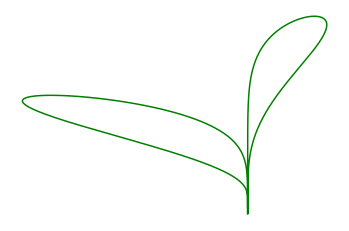

In [65]:
n = chapter_number
maxt=(2*(n-1)+3)*np.pi/2
t = np.linspace(np.pi/2, maxt, 1000)
tt= 1.0/(t+0.01)
x = (maxt-t)*np.cos(t)**3
y = t*np.sqrt(np.abs(np.cos(t))) + np.sin(0.3*t)*np.cos(2*t)
plt.plot(x, y, c="green")
plt.axis('off');

In [66]:
end = time.time()
print(f'This notebook run in {int(end - start):d} seconds')

This notebook run in 4 seconds
